#Import Library

In [ ]:
import pandas as pd
import numpy as np

##Read data

In [ ]:
data=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape

(13320, 9)

##Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
for column in data.columns:
  print(data[column].value_counts().sum())

13320
13320
13319
13304
7818
13320
13247
12711
13320


##Data Processing

In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df1=data.drop(['area_type', 'availability','society'], axis = 1)

In [ ]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [ ]:
df2=df1.dropna()

In [ ]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [ ]:
df2.shape

(12710, 6)

In [ ]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:
df2['bhk'] = df2['size'].apply(lambda x: x.split(' ')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [ ]:
df2=df2.drop(['size'],axis=1)

In [ ]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def conv(x):
    arr = x.split('-')
    if len(arr) == 2:
        avg = (float(arr[0]) + float(arr[1]))/2
        return avg
    try:
        return float(x)
    except:
        return None

In [ ]:
df2['total_sqft'] = df2['total_sqft'].apply(lambda x: conv(x))

In [ ]:
df2.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
8,Marathahalli,1310.0,3.0,1.0,63.25,3
10,Whitefield,1800.0,2.0,2.0,70.00,3
11,Whitefield,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2


In [ ]:
df2['location'].value_counts()

Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: location, Length: 1265, dtype: int64

In [ ]:
df2['location'] = df2['location'].apply(lambda x: x.strip())

In [ ]:
location_count=df2.location.value_counts()

In [ ]:
location_count

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [ ]:
location_count_10 = location_count[location_count < 10]

In [ ]:
location_count_10

Nehru Nagar           9
KUDLU MAIN ROAD       9
Volagerekallahalli    9
2nd Phase JP Nagar    9
Kamakshipalya         9
                     ..
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1007, dtype: int64

In [ ]:
df3 = df2.copy()

In [ ]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_count_10 else x)

In [ ]:
df3

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [ ]:
df3['bhk'] = df3['bhk'].astype('float')

In [ ]:
df3 = df3[~(df3.total_sqft/df3.bhk < 300)]

In [ ]:
df3

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,1200.0,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3.0
13315,Whitefield,3453.0,4.0,0.0,231.00,5.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0


In [ ]:
df3['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [ ]:
df3['per_sq_feet_price'] = (df3['price']*100000)/df3['total_sqft']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3['per_sq_feet_price'].describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: per_sq_feet_price, dtype: float64

In [ ]:
def rmv_outlierBy_std(x):
    out_df = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        mean = np.mean(subdf.per_sq_feet_price)
        std = np.std(subdf.per_sq_feet_price)
        reduced_df = subdf[(subdf.per_sq_feet_price > (mean - std)) & (subdf.per_sq_feet_price < (mean + std))]
        out_df = pd.concat([out_df, reduced_df], ignore_index = True)
    return out_df

df4 = rmv_outlierBy_std(df3)

In [ ]:
df4

,location,total_sqft,bath,balcony,price,bhk,per_sq_feet_price
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...
9824,other,1256.0,2.0,1.0,65.00,2.0,5175.159236
9825,other,1353.0,2.0,2.0,110.00,2.0,8130.081301
9826,other,812.0,1.0,0.0,26.00,1.0,3201.970443
9827,other,1440.0,2.0,2.0,63.93,3.0,4439.583333


In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sq_feet_price),
                'std': np.std(bhk_df.per_sq_feet_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sq_feet_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)

In [ ]:
df5.shape

(7063, 7)

In [ ]:
df5[df5.bath>10]

,location,total_sqft,bath,balcony,price,bhk,per_sq_feet_price
9267,other,5425.0,13.0,0.0,275.0,13.0,5069.124424


Text(0, 0.5, 'Count')

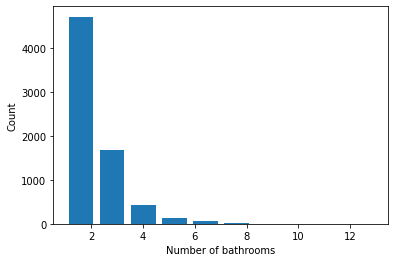

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df6 = df5[df5.bath < df5.bhk + 2]

In [ ]:
df6.shape

(6996, 7)

In [ ]:
df6.head()

,location,total_sqft,bath,balcony,price,bhk,per_sq_feet_price
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,11983.805668


In [ ]:
final_DF = df6.drop(['per_sq_feet_price'], axis = 1)

In [ ]:
final_DF.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0


##Creating Dummy Variables

In [ ]:
dummies = pd.get_dummies(final_DF.location)

In [ ]:
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_DF['location'].value_counts()

other                    1056
Whitefield                230
Sarjapur  Road            179
Electronic City           162
Raja Rajeshwari Nagar     138
                         ... 
Thyagaraja Nagar            4
Banjara Layout              4
HAL 2nd Stage               4
Vishveshwarya Layout        3
Marsur                      3
Name: location, Length: 248, dtype: int64

In [ ]:
final_DF = pd.concat([final_DF, dummies], axis = 1)

In [ ]:
final_DF

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,other,1155.0,2.0,1.0,64.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9821,other,1200.0,2.0,3.0,70.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9822,other,1800.0,1.0,1.0,200.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9825,other,1353.0,2.0,2.0,110.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_DF = final_DF.drop(['location'], axis = 1)

In [ ]:
final_DF

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,1155.0,2.0,1.0,64.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9821,1200.0,2.0,3.0,70.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9822,1800.0,1.0,1.0,200.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9825,1353.0,2.0,2.0,110.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = final_DF.drop(['price'], axis = 1).values

In [ ]:
y = final_DF['price'].values
y = y.reshape(len(y),1)

##Split Data in Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5596, 252), (1400, 252), (5596, 1), (1400, 1))

##Apply Multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[125.58  90.  ]
 [ 52.11  46.75]
 [146.72 145.  ]
 ...
 [147.52 170.  ]
 [ 36.6   48.  ]
 [194.82 160.  ]]


##Multiple regression R-square

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8383639645911061

##Scaling of Features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x_train = sc_X.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)

## Apply Support vector regression

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(sc_X.transform(x_test))
y_pred = y_pred.reshape(len(y_pred),1)
y_pred = sc_y.inverse_transform(y_pred)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[112.43  90.  ]
 [ 51.9   46.75]
 [143.77 145.  ]
 ...
 [152.83 170.  ]
 [ 42.84  48.  ]
 [117.56 160.  ]]


##SVR R-square

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7664276796322708